In [3]:
from netopt import netopt, print_dict, plot_map, set_capacity, set_all_capacities
from scenario_5 import warehouses, customers, distance


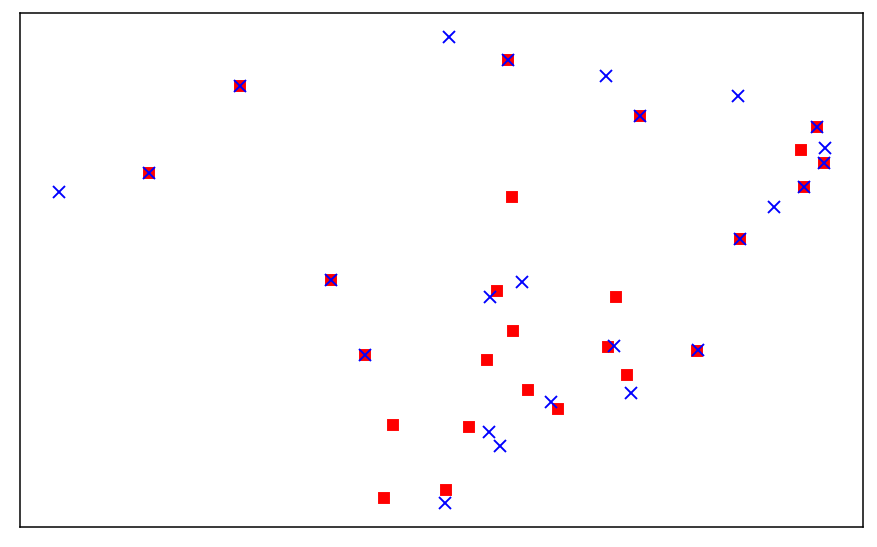

In [4]:
plot_map(warehouses=warehouses,
         customers=customers,
         warehouse_markersize=5,
         warehouse_marker='s',
         warehouse_markercolor='red',
         customer_markersize=6,
         customer_marker='x',
         customer_markercolor='blue')

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 323.0

Open warehouses:
ID: 164 City: Santos               State: Brazil Num. customers:   4  Outflow:  41545912.0 units
ID:   5 City: Anápolis             State: Brazil Num. customers:   6  Outflow:   7986478.0 units
ID:  19 City: Belém                State: Brazil Num. customers:   5  Outflow:   7267529.0 units
ID: 147 City: Recife               State: Brazil Num. customers:   7  Outflow:  17936334.0 units
ID:  94 City: Juiz de Fora         State: Brazil Num. customers:   3  Outflow:  23930340.0 units

Total outflow: 98666593.0 units
% of demand in range     0 -   800: 89.2
% of demand in range   800 -  1200: 8.2
% of demand in range  1200 - 99999: 2.6
Most distant customer is at 2523.69
Average customers distance (no weights): 612.378
{   'active_warehouses_id': {164, 5, 19, 147, 94},
    'active_warehouses_name': [   'Santos',
                                  'Anápolis',
         

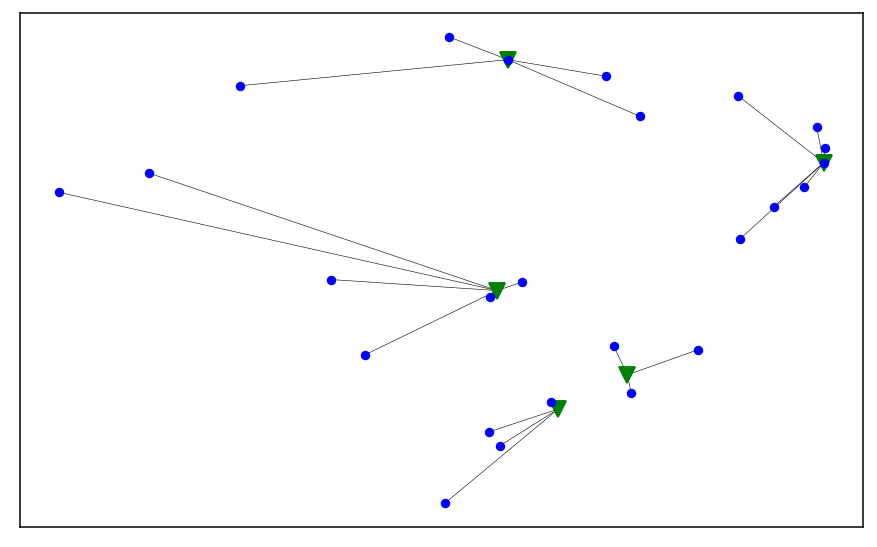

In [6]:
# Solve a mindistance problem
results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 distance_ranges=[0, 800, 1200],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8,
                hide_inactive=True)
print_dict(results)

In [7]:
# We would like to spread the quantity more evenly
# Let's limit the capacity of the five warehouses to 1/5 of the total demand

set_all_capacities(warehouses, 20_000_000)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Infeasible
********* ERROR: Model not feasible, don't use results.
Average weighted distance: 341.0

Open warehouses:
ID:  19 City: Belém                State: Brazil Num. customers:   7  Outflow: 7657216.6191879 units
ID: 147 City: Recife               State: Brazil Num. customers:   7  Outflow: 17395294.0994562 units

Total outflow: 25052510.718644097 units
% of demand in range     0 -   800: 87.5
% of demand in range   800 -  1200: 9.8
% of demand in range  1200 - 99999: 2.7
Most distant customer is at 2731.95
Average customers distance (no weights): 669.884693877551

Customers served by more than one warehouse
- Customer 1 is served by 2 warehouses
- Customer 2 is served by 2 warehouses
- Customer 3 is served by 2 warehouses
- Customer 4 is served by 2 warehouses
- Customer 5 is served by 3 warehouses
- Customer 6 is served by 4 warehouses
- Customer 9 is served by 4 warehouses
- Customer 11 is served by 3 warehouse

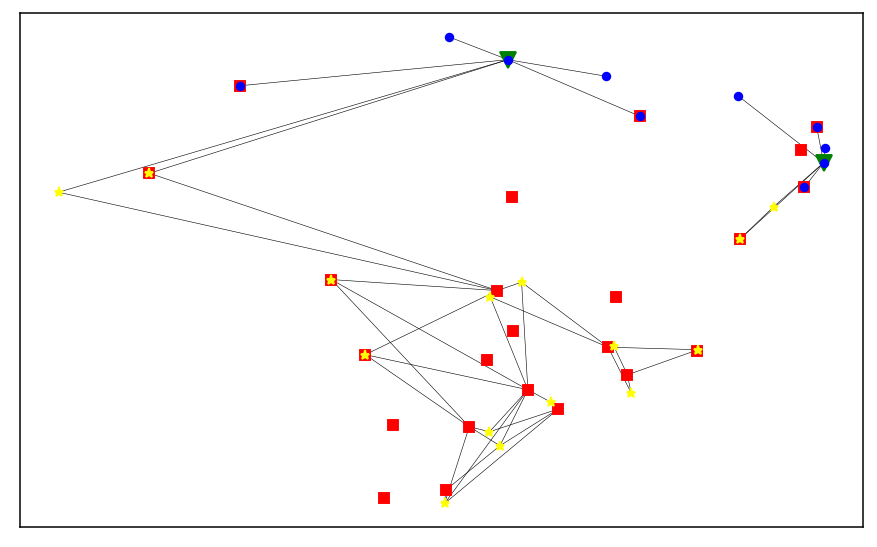

In [8]:
# Solve again a mindistance problem with capacities, enforcing the single sourcing constraint
results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 distance_ranges=[0, 800, 1200],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8)
print_dict(results)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 339.0

Open warehouses:
ID: 164 City: Santos               State: Brazil Num. customers:   1  Outflow:  29029226.0 units
ID: 139 City: Ponta Grossa         State: Brazil Num. customers:   5  Outflow:  14712066.0 units
ID:  19 City: Belém                State: Brazil Num. customers:   7  Outflow:   7946863.0 units
ID: 147 City: Recife               State: Brazil Num. customers:   7  Outflow:  17936334.0 units
ID:  94 City: Juiz de Fora         State: Brazil Num. customers:   5  Outflow:  29042104.0 units

Total outflow: 98666593.0 units
% of demand in range     0 -   800: 89.0
% of demand in range   800 -  1200: 7.2
% of demand in range  1200 - 99999: 3.8
Most distant customer is at 2731.95
Average customers distance (no weights): 678.2724
{   'active_warehouses_id': {164, 139, 19, 147, 94},
    'active_warehouses_name': [   'Santos',
                                  'Ponta Grossa',
  

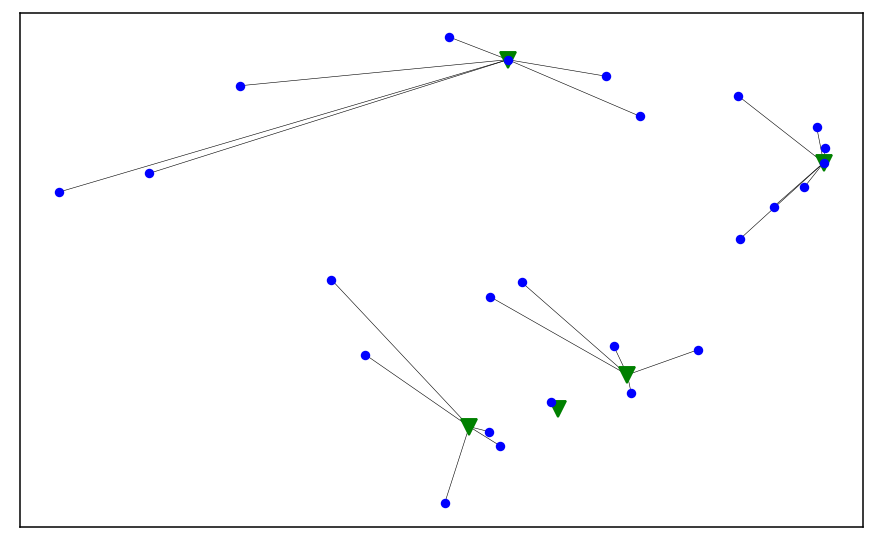

In [10]:
# Increase the warehouse maximum capacity to 30.000.000 and solve again
set_all_capacities(warehouses, 30_000_000)

results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 distance_ranges=[0, 800, 1200],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8,
                 hide_inactive=True)
print_dict(results)


CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 441.0

Open warehouses:
ID:  32 City: Campina Grande       State: Brazil Num. customers:   9  Outflow: 20000000.000733122 units
ID: 164 City: Santos               State: Brazil Num. customers:   1  Outflow: 19999999.92950984 units
ID:   5 City: Anápolis             State: Brazil Num. customers:  12  Outflow: 18666593.04317221 units
ID: 139 City: Ponta Grossa         State: Brazil Num. customers:   4  Outflow: 20000000.11960752 units
ID:  94 City: Juiz de Fora         State: Brazil Num. customers:   3  Outflow: 19999999.96503576 units

Total outflow: 98666593.05805844 units
% of demand in range     0 -   800: 70.2
% of demand in range   800 -  1200: 22.2
% of demand in range  1200 - 99999: 7.5
Most distant customer is at 2523.69
Average customers distance (no weights): 804.5565517241379

Customers served by more than one warehouse
- Customer 1 is served by 3 warehouses
- Customer 3 is s

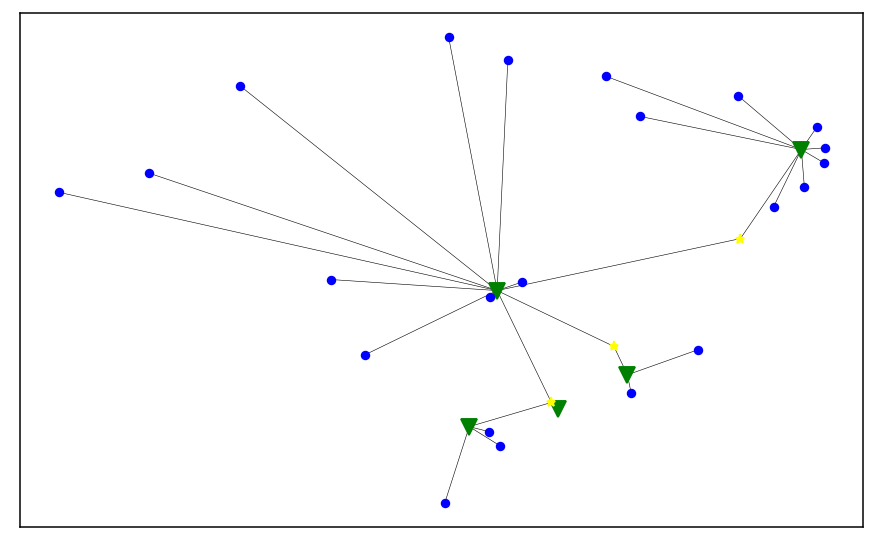

In [12]:
# Set the warehouse maximum capacity to 20.000.000 and allow for multiple warehouses serving a single customer
# with the parameter force_single_sourcing set to False
set_all_capacities(warehouses, 20_000_000)

results = netopt(num_warehouses=5,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 distance_ranges=[0, 800, 1200],
                 force_single_sourcing=False,
                 plot=True,
                 hide_inactive=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8)
print_dict(results)